In [1]:
%matplotlib inline


# Cuantización de color usando K-medias


Realiza una cuantización vectorial (VQ) en píxeles de una imagen del palacio de verano
(China), reduciendo la cantidad de colores necesarios para mostrar la imagen de 96,615
colores únicos a 64, al tiempo que conserva la calidad general de la apariencia.

En este ejemplo, los píxeles se representan en un espacio 3D y K-means se utiliza para
encontrar 64 grupos de colores. En la literatura de procesamiento de imágenes, el libro de códigos
obtenido de K-means (los centros de agrupación) se llama paleta de colores. Utilizando
un solo byte, se pueden direccionar hasta 256 colores, mientras que una codificación RGB
requiere 3 bytes por píxel. El formato de archivo GIF, por ejemplo, utiliza
paleta.

A modo de comparación, una imagen cuantificada utilizando un libro de códigos aleatorio (colores recogidos
al azar) también se muestra.


Automatically created module for IPython interactive environment
Modelo de ajuste en una pequeña submuestra de datos
Hecho en 0.374s.
Predicción de índices de color en la imagen completa (k-means)
Hecho en 0.379s.
Predicción de índices de color en la imagen completa (aleatorio)
Hecho en 0.384s.


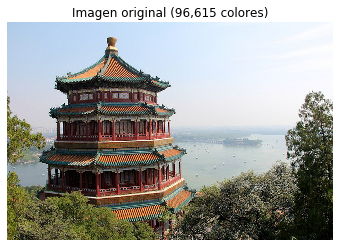

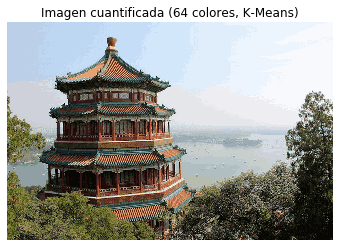

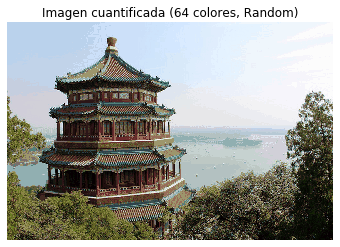

In [2]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Cargar la imagen
china = load_sample_image("china.jpg")

# Convertir a flotantes en lugar de la codificación entera predeterminada de 8 bits. Dividiendo por
# 255 es importante para que el comportamiento de plt.imshow funcione bien en datos flotantes (es necesario
# estar en el rango [0-1])
china = np.array(china, dtype=np.float64) / 255

# Cargue la imagen y transfórmela en una matriz numpy 2D.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Modelo de ajuste en una pequeña submuestra de datos")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("Hecho en %0.3fs." % (time() - t0))

# Obtener etiquetas para todos los puntos
print("Predicción de índices de color en la imagen completa (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("Hecho en %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicción de índices de color en la imagen completa (aleatorio)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("Hecho en %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recrea la imagen (comprimida) del libro de códigos y las etiquetas"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Mostrar todos los resultados, junto con la imagen original
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagen original (96,615 colores)')
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagen cuantificada (64 colores, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Imagen cuantificada (64 colores, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()